## QBUS3850 Lab 3 (ARIMA Models) Task

Use an ARIMA model to forecast the Shampoo Sales Dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import statsmodels as sm 
import statsmodels.api as smt

## Make larger plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### 1.   Load and plot the Shampoo sales dataset.   

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64


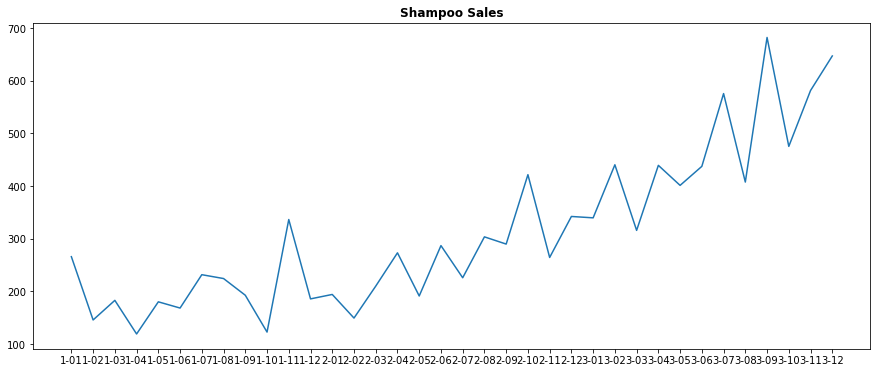

In [2]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', parse_dates=True, index_col='Month')
ts = data['Sales of shampoo over a three year period']
print( ts.head() )

plt.figure()
plt.plot(ts)
plt.title("Shampoo Sales", weight = 'bold')
plt.show()

### 2. Select a suitable difference order d in order to obtain a stationary data.

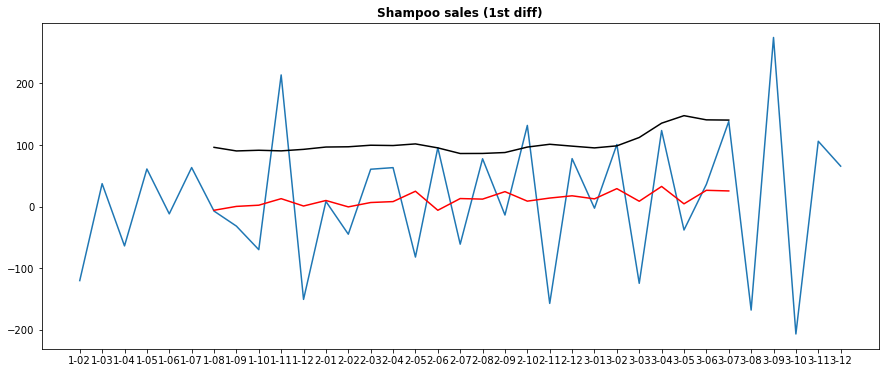

In [4]:
## take a log transform...
#ts_log = np.log(ts)
## ...or not.
ts_log = ts

## take the 1st order diff
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
assert( sum( np.isnan( ts_log_diff ) ) == 0 )

## Plot to visually inspect stationarity
rolmean = ts_log_diff.rolling( window=12, center=True ).mean()
rolstd = ts_log_diff.rolling( window=12, center=True ).std()

plt.figure()
plt.plot(ts_log_diff)
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.title("Shampoo sales (1st diff)", weight = 'bold')
plt.show()

In [5]:
## Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
dftest = adfuller( ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


### 3.   Plot the PACF curve of the differenced data and select a suitable order for AR(p) process.

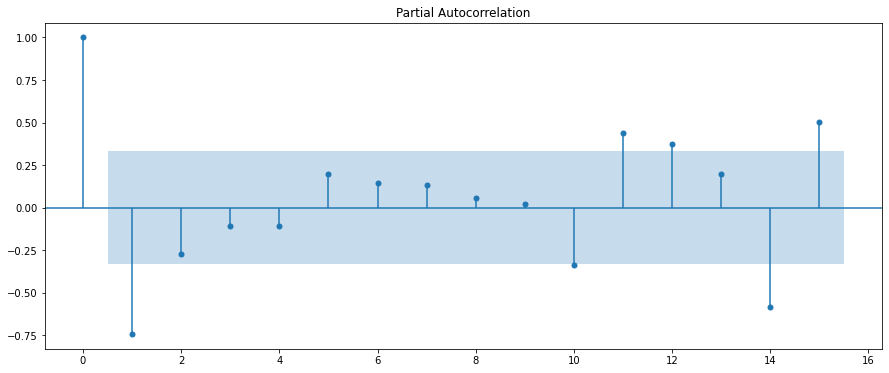

In [6]:
## PACF cuts off at lag 1
smt.graphics.tsa.plot_pacf(ts_log_diff, lags=15, alpha = 0.05)
print()

### 4. Plot the ACF curve of the differenced data and select a suitable order for MA(q) process.

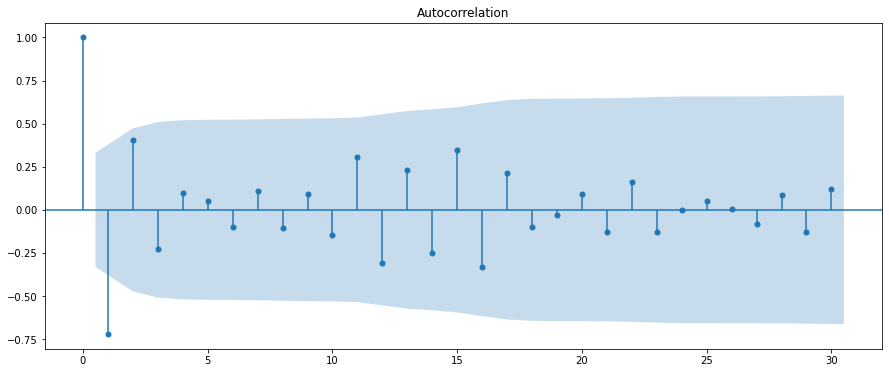

In [6]:
## ACF cuts off at lag 1
smt.graphics.tsa.plot_acf(ts_log_diff, lags=30, alpha = 0.05)
print()

## this behaviour in the ACF: positive then negative correlations in a repeating, clear 
## pattern can be a sign of over-differencing the data. However, the trend has been removed by 1st differencing, so we 
## stick with that choice.

### 5. Use the selected p, d, and q to form an ARIMA(p,d,q) model.

In [7]:
from statsmodels.tsa.arima_model import ARIMA

p, d, q = 1, 1, 0
fit = ARIMA(ts_log, order=( p, d, q ), freq=None).fit()


C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e

### 6.   Based on the trained ARIMA model, generate the forecasted sequence and then calculate the residual.


C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\rgerlach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.

36    660.123195
37    650.477712
38    678.122906
39    678.305976
40    698.713089
41    704.226529
42    720.708176
43    729.112462
44    743.465192
45    753.437285
dtype: float64


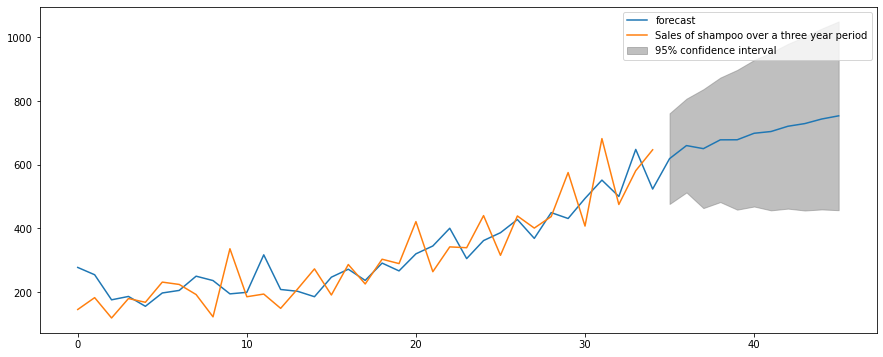

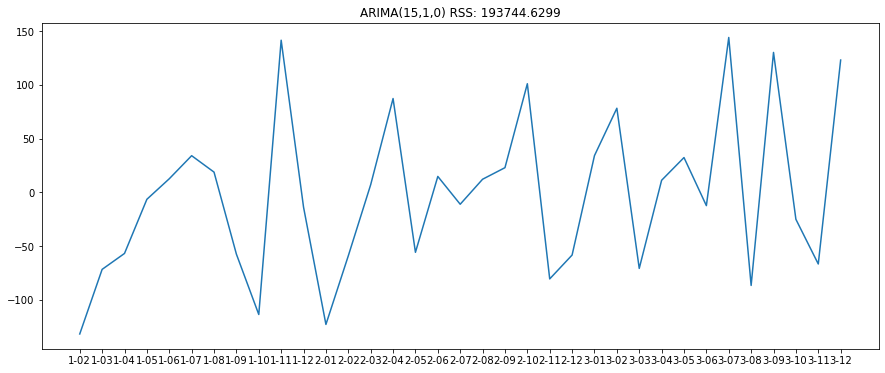

In [8]:
# Actual vs Fitted 
fit.plot_predict( start=1, end=len(ts_log)+10, alpha=0.05 )

# Fitted values
f1 = fit.predict( start=1, end=len(ts_log)+10, typ='levels', dynamic=False )
print( f1.tail(10) )

## Residuals
residuals = pd.DataFrame( fit.resid ) 
plt.figure() 
plt.plot(residuals)
plt.title('ARIMA(15,1,0) RSS: %.4f'% sum((fit.resid.values)**2))
plt.show()
